## Survival of Titanic Disaster using Logistic Regression


Data Source: Kaggle [Titanic Dataset](https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

We are going to build a predictive model that answers the question:  Who had survived?

### 1. Environment Setup

In [1]:
# Importing necessary librarires
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
import math

#To display more lines in default print commands:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
titanic = pd.read_csv(r"C:\Mrityunjaya\Learning\ML\Logistic\titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Exploratory Data Analysis

In [3]:
print("Number of passengers in original data:", len(titanic))
print("Shape of Data:",titanic.shape)

Number of passengers in original data: 891
Shape of Data: (891, 12)


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
NA=[feature for feature in titanic.columns if titanic[feature].isnull().sum()>0]
for feature in NA:
    print("Percentage of missing records in",feature,np.round((titanic[feature].isnull().sum()/len(titanic))*100,2),"%")


Percentage of missing records in Age 19.87 %
Percentage of missing records in Cabin 77.1 %
Percentage of missing records in Embarked 0.22 %


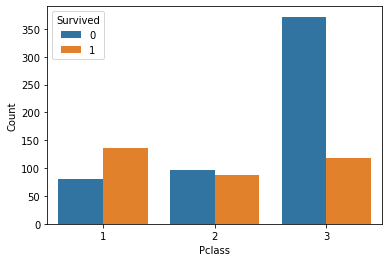

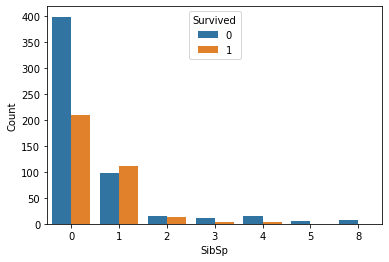

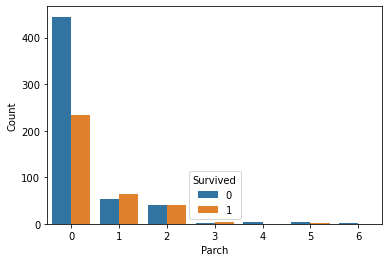

In [7]:
# Filtering discrete numerical features
numerical =[feature for feature in titanic.columns if titanic[feature].dtypes!='O' and feature not in ['Survived','PassengerId','Fare','Age']]
for feature in numerical:
    t_copy=titanic.copy()
    sns.countplot(x=t_copy[feature],hue='Survived',data=t_copy)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

Observation from above graph:
- Survival of passenger is less dependent on passenger's class.
- Passenger's who had 0 or 1 sibling have high chance of survival.
- Passenger's who had travelled with their parents and childrens had high correlation with survival. As number of parents & chidrens increases the survival probability of that passenger is getting decreased.

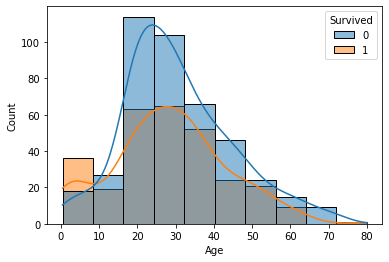

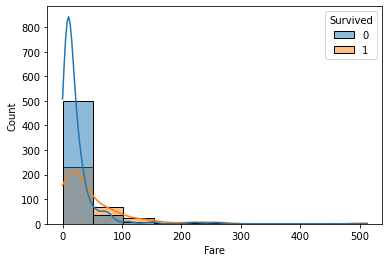

In [8]:
# Filtering continuous numerical features
continuous =[feature for feature in titanic.columns if titanic[feature].dtypes!='O' and feature not in ['Pclass','SibSp','Parch','Survived','PassengerId']]
for feature in continuous:
    t_copy=titanic.copy()
    sns.histplot(x=t_copy[feature],hue=t_copy['Survived'],bins=10,kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

Observation from above graph:
- Passenger's of age group 20 to 40 have high chane of survival.
- Passenger's who had travelled in economy class have high change of survival.
- Fare & Age data of passenger's are not following the Gaussian distribution.

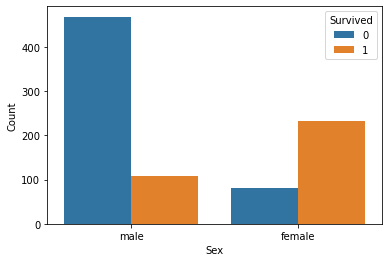

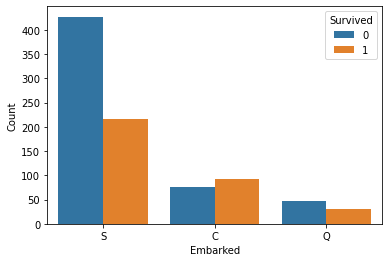

In [9]:
# Exloring categorical features
categorical =[feature for feature in titanic.columns if titanic[feature].dtypes=="O" and not feature in ['Name','Ticket','Cabin']]
for feature in categorical:
    t_copy=titanic.copy()
    sns.countplot(x=t_copy[feature],hue=t_copy['Survived'])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

Observation from above graph:
- Female passenger's have high chance of survival than male passenger.
- Class "S" of Embarked has high chance of survival.

<AxesSubplot:xlabel='Survived', ylabel='count'>

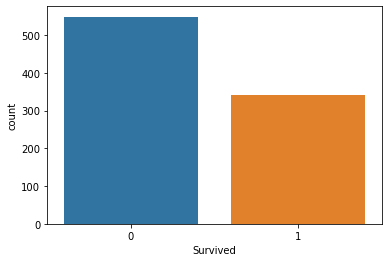

In [10]:
sns.countplot(x = "Survived", data = titanic)

In [11]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

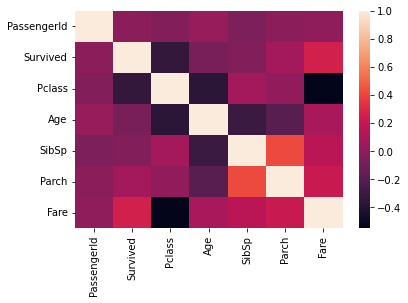

In [12]:
sns.heatmap(titanic.corr())

<AxesSubplot:>

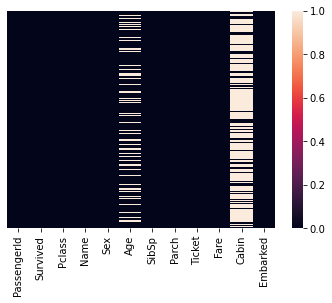

In [13]:
sns.heatmap(titanic.isnull(), yticklabels = False)

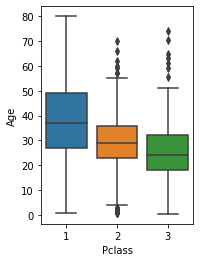

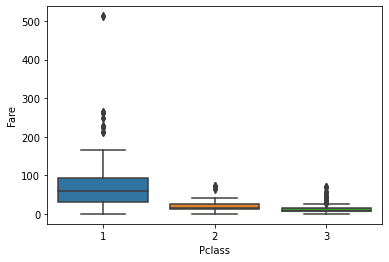

In [14]:
plt.subplot(1,2,1)
for feature in continuous:
    t_copy=titanic.copy()
    #plt.figure(figsize=(5,10))
    sns.boxplot(x = "Pclass", y = feature, data = titanic)
    plt.show()

Fare & Age variables contains outliers. Hence we need to normalize the dataset.

### 3. Data Preprocessing

In [15]:
for feature in NA:
    titanic[feature+'null']=np.where(titanic[feature].isnull(),1,0)

In [16]:
# Imputting missing values of Age with median since the data is skewed.

titanic['Age']=np.where(titanic['Age'].isnull(),titanic['Age'].median(),titanic['Age'])

In [17]:
# Imputting missing values of Cabin with General class.

titanic['Cabin']=np.where(titanic['Cabin'].isnull(),'General',titanic['Cabin'])

In [18]:
# Imputting missing values of Embarked with mode.

titanic['Embarked']=np.where(titanic['Embarked'].isnull(),titanic['Embarked'].mode(),titanic['Embarked'])

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenull,Cabinnull,Embarkednull
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,General,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,General,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,General,S,0,1,0


In [20]:
titanic.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Agenull         0
Cabinnull       0
Embarkednull    0
dtype: int64

In [21]:
#Convert Categorical Variables into Numerical Variables (Dummy)
cat=['Sex','Embarked','Pclass']
for feature in cat:
    x=pd.get_dummies(titanic[feature],drop_first=True)
    titanic=pd.concat([titanic,x],axis=1)


In [22]:
titanic_data=titanic.drop(columns=['PassengerId','Pclass','Name','Sex','Ticket','Cabin','Embarked','Agenull','Cabinnull','Embarkednull'])
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [23]:
titanic_data.shape

(891, 10)

<AxesSubplot:>

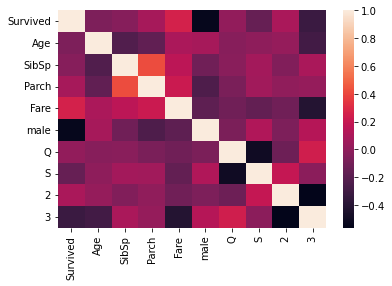

In [24]:
sns.heatmap(titanic_data.corr())

In [25]:
titanic_data.corr()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
Survived,1.000000,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683,0.093349,-0.322308
Age,-0.064910,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.031415,-0.006729,0.015831,-0.291955
SibSp,-0.035322,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734,-0.055932,0.092548
Parch,0.081629,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814,-0.000734,0.015790
Fare,0.257307,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184,-0.118557,-0.413333
male,-0.543351,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224,-0.064746,0.137143
Q,0.003650,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421,-0.127301,0.237449
S,-0.149683,-0.006729,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000,0.189980,-0.015104
2,0.093349,0.015831,-0.055932,-0.000734,-0.118557,-0.064746,-0.127301,0.189980,1.000000,-0.565210
3,-0.322308,-0.291955,0.092548,0.015790,-0.413333,0.137143,0.237449,-0.015104,-0.565210,1.000000


In [26]:
titanic_data.dtypes

Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
Q             uint8
S             uint8
2             uint8
3             uint8
dtype: object

In [27]:
dt=[feature for feature in titanic_data.columns if titanic_data[feature].dtypes=='uint8']
for feature in dt:
    titanic[feature].astype('int64')

### 4. Applying Logistic Regression

In [28]:
X = titanic_data.drop("Survived",axis=1)
y = titanic["Survived"]

In [29]:
#from sklearn import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 1)

In [30]:
print("X_train Shape",X_train.shape)
print("X_test Shape",X_test.shape)
print("y_train Shape",y_train.shape)
print("y_test Shape",y_test.shape)

X_train Shape (668, 9)
X_test Shape (223, 9)
y_train Shape (668,)
y_test Shape (223,)


In [31]:
#Normalizing the independent features
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

C:\Users\chmr2001\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\chmr2001\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\chmr2001\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [32]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression( solver='sag',max_iter=150,penalty='l2')
logmodel.fit(X_train_scaled,y_train)
predictions = logmodel.predict(X_test_scaled)

### 5. Evaluating Results

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[110,  18],
       [ 28,  67]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7937219730941704

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       128
           1       0.79      0.71      0.74        95

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.79      0.79      0.79       223



### Finding:
- Accuracy of the model is 79.4%
- The proportion of true positive predictions out of all positive predictions is around 79%. 
- The proportion of true positive predictions out of all actual positive instances is around 79%.
- The harmonic mean of precision and recall is 0.79. This is also called F1-Score.

### Advanced

In [36]:
predicted_prob_test=logmodel.predict_proba(X_test)
predicted_prob_test

C:\Users\chmr2001\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[1.00000000e+00, 1.07057174e-39],
       [1.00000000e+00, 6.26118894e-26],
       [1.00000000e+00, 8.18013861e-14],
       [1.00000000e+00, 1.23640925e-24],
       [9.71092069e-01, 2.89079314e-02],
       [1.00000000e+00, 1.60664308e-19],
       [1.00000000e+00, 2.13285797e-30],
       [1.00000000e+00, 2.31387667e-24],
       [1.00000000e+00, 1.81304849e-14],
       [1.00000000e+00, 3.89426183e-24],
       [1.00000000e+00, 3.51652519e-23],
       [1.00000000e+00, 5.07602352e-23],
       [1.00000000e+00, 1.92677411e-42],
       [1.00000000e+00, 1.34472726e-24],
       [1.00000000e+00, 1.08392118e-24],
       [1.00000000e+00, 2.39509077e-22],
       [9.99999964e-01, 3.57711709e-08],
       [1.00000000e+00, 1.21627293e-21],
       [1.00000000e+00, 2.91589365e-33],
       [1.00000000e+00, 4.44326358e-20],
       [1.00000000e+00, 1.36465186e-29],
       [1.00000000e+00, 1.86621419e-23],
       [1.00000000e+00, 5.81809319e-14],
       [9.99998346e-01, 1.65399708e-06],
       [1.000000

                                     Thanks for visiting. 🙏🙏